##### Imports

In [5]:
from PIL import Image
import numpy as np
from statistics import median
from itertools import zip_longest
import matplotlib.pyplot as plt

## 01)  RGB-YIQ-RGB

In [4]:
def rgb2Yiq(image):
    imageCopy = np.zeros(image.shape)
    for i in range(len(image)):
        for j in range(len(image[0])):
            y =  (0.299*image[i][j][0])+(0.587*image[i][j][1])+(0.114*image[i][j][2])
            ii = (0.596*image[i][j][0])-(0.274*image[i][j][1])-(0.322*image[i][j][2])
            q =  (0.211*image[i][j][0])-(0.523*image[i][j][1])+(0.312*image[i][j][2])
            imageCopy[i][j][0], imageCopy[i][j][1], imageCopy[i][j][2] = round(y,2), round(ii,2), round(q,2)
    return imageCopy

def yiq2Rgb(image):
    for i in range(len(image)):
        for j in range(len(image[0])):
            r = image[i][j][0]+(0.956*image[i][j][1])+(0.621*image[i][j][2])
            g = image[i][j][0]-(0.272*image[i][j][1])-(0.647*image[i][j][2])
            b = image[i][j][0]-(1.106*image[i][j][1])+(1.703*image[i][j][2])
            image[i][j][0], image[i][j][1], image[i][j][2] = __ajustYiq2Rgb(round(r)), __ajustYiq2Rgb(round(g)), __ajustYiq2Rgb(round(b))
    return image.astype(int)

def __ajustYiq2Rgb(pixel):
    if pixel < 0: pixel = 0
    elif pixel > 255: pixel = 255
    return pixel

Mode: RGB
Size: (300, 300)


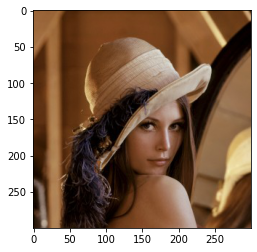

In [11]:
image = Image.open('lena.jpg')
plt.imshow(image)
print('Mode:',image.mode)
print('Size:',image.size);

In [12]:
imageArray = np.array(image)
imageYIQ = rgb2Yiq(imageArray)
imageYIQ = yiq2Rgb(imageYIQ)

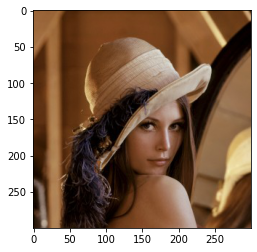

In [13]:
plt.imshow(imageYIQ);

## 2) Negative 

#### 2.1) Negativo em RGB

In [14]:
def rgbNegative(image):
    for i in range(len(image)):
        for j in range(len(image[0])):
          for k in range(len(image[0][0])):
            image[i][j][k] =  255-image[i][j][k]
    return image

Mode: RGB
Size: (300, 300)


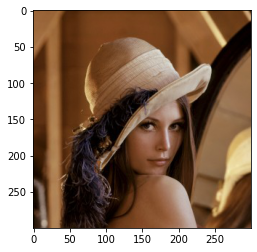

In [15]:
image = Image.open('lena.jpg')
plt.imshow(image)
print('Mode:',image.mode)
print('Size:',image.size)

In [16]:
imageArray = np.array(image)
imageNeg = rgbNegative(imageArray)

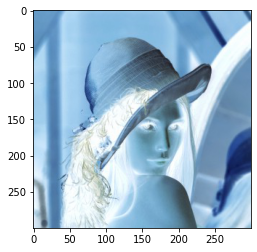

In [17]:
plt.imshow(imageNeg);

#### 2.2) Negativo em Y

In [18]:
def yNegative(image):
    for i in range(len(image)):
        for j in range(len(image[0])):
          for k in range(len(image[0][0])):
            image[i][j][0] =  255-image[i][j][0]
    return image

In [19]:
imageArray = np.array(image)
imageYIQ = rgb2Yiq(imageArray)
imageNeg = yNegative(imageYIQ)
imageNeg = yiq2Rgb(imageYIQ)

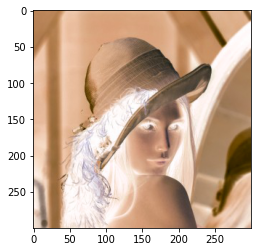

In [20]:
plt.imshow(imageNeg);

## 3/4) Correlation

#### 3.1) Kernels

In [25]:
def box(matrix): #Box m x n em RGB
    tot_sumR, tot_sumG, tot_sumB = 0, 0, 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            tot_sumR += matrix[i][j][0]
            tot_sumG += matrix[i][j][1]
            tot_sumB += matrix[i][j][2]
    return [tot_sumR // (len(matrix)*len(matrix[0])), tot_sumG // (len(matrix)*len(matrix[0])), tot_sumB // (len(matrix)*len(matrix[0]))]

def mediana(matrix): #Median m x n in RGB
    RArray, GArray, BArray = [], [], []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            RArray.append(matrix[i][j][0])
            GArray.append(matrix[i][j][1])
            BArray.append(matrix[i][j][2])
    RArray.sort()
    GArray.sort()
    BArray.sort()
    return [round(median(RArray)), round(median(GArray)), round(median(BArray))]

def sobelV(matrix):#matrix must be np array. Sobel is 3x3
    matrixCopy = np.array(matrix.copy())
    
    #BANDA R
    matrixCopy[0][0][0] = -1*matrixCopy[0][0][0]
    matrixCopy[0][1][0] = 0
    matrixCopy[1][0][0] = -2*matrixCopy[1][0][0]
    matrixCopy[1][1][0] = 0
    matrixCopy[1][2][0] = 2*matrixCopy[1][2][0]
    matrixCopy[2][0][0] = -1*matrixCopy[2][0][0]
    matrixCopy[2][1][0] = 0
    
    #BANDA G
    matrixCopy[0][0][1] = -1*matrixCopy[0][0][1]
    matrixCopy[0][1][1] = 0
    matrixCopy[1][0][1] = -2*matrixCopy[1][0][1]
    matrixCopy[1][1][1] = 0
    matrixCopy[1][2][1] = 2*matrixCopy[1][2][1]
    matrixCopy[2][0][1] = -1*matrixCopy[2][0][1]
    matrixCopy[2][1][1] = 0
    
    #BANDA B
    matrixCopy[0][0][2] = -1*matrixCopy[0][0][2]
    matrixCopy[0][1][2] = 0
    matrixCopy[1][0][2] = -2*matrixCopy[1][0][2]
    matrixCopy[1][1][2] = 0
    matrixCopy[1][2][2] = 2*matrixCopy[1][2][2]
    matrixCopy[2][0][2] = -1*matrixCopy[2][0][2]
    matrixCopy[2][1][2] = 0
    return [np.sum(matrixCopy[:,:,0]),np.sum(matrixCopy[:,:,1]),np.sum(matrixCopy[:,:,2])]

def sobelH(matrix):#matrix must be np array. Sobel is 3x3
    matrixCopy = np.array(matrix.copy())
    
    #BANDA R
    matrixCopy[0][0][0] = -1*matrixCopy[0][0][0]
    matrixCopy[0][1][0] = -2*matrixCopy[0][1][0]
    matrixCopy[0][2][0] = -1*matrixCopy[0][2][0]
    matrixCopy[1][0][0] = 0
    matrixCopy[1][1][0] = 0
    matrixCopy[1][2][0] = 0
    matrixCopy[2][1][0] = 2*matrixCopy[2][1][0]
    
    #BANDA G
    matrixCopy[0][0][1] = -1*matrixCopy[0][0][1]
    matrixCopy[0][1][1] = -2*matrixCopy[0][1][1]
    matrixCopy[0][2][1] = -1*matrixCopy[0][2][1]
    matrixCopy[1][0][1] = 0
    matrixCopy[1][1][1] = 0
    matrixCopy[1][2][1] = 0
    matrixCopy[2][1][1] = 2*matrixCopy[2][1][1]
    
    #BANDA B
    matrixCopy[0][0][2] = -1*matrixCopy[0][0][2]
    matrixCopy[0][1][2] = -2*matrixCopy[0][1][2]
    matrixCopy[0][2][2] = -1*matrixCopy[0][2][2]
    matrixCopy[1][0][2] = 0
    matrixCopy[1][1][2] = 0
    matrixCopy[1][2][2] = 0
    matrixCopy[2][1][2] = 2*matrixCopy[2][1][2]
    return [np.sum(matrixCopy[:,:,0]),np.sum(matrixCopy[:,:,1]),np.sum(matrixCopy[:,:,2])]

#### 3.2) Histogram stretching

In [26]:
def getComponent(matrix, color):
    aux = []
    for i in range(len(matrix)):
      for j in range(len(matrix[0])):
        aux.append(matrix[i][j][color])
    return aux

def setComponent(matrix, expHist, color):
    for i in range(len(matrix)):
      for j in range(len(matrix[0])):
        matrix[i][j][color] = expHist[0]
        expHist.pop(0)
    return matrix

def histExp(hist, rMin, rMax):
    expandedHist = []
    for i in hist:
        expandedHist.append(round(((i-rMin)/(rMax-rMin))*255))
    return expandedHist

#### 3.3) Correlation

In [38]:
def rowDivider(image, n): #separa as linhas da imagem de acordo com o numero de linhas (m).
    c = []
    imageCopy = image.copy()
    while len(imageCopy) > n-1:
        c.append(imageCopy[:n])
        imageCopy.pop(0)
    return c

def columnDivider(a,m): #separa as colunas da imagem de acordo com o numero de colunas (n).
    return rowDivider([i for i in range(len(a))], m)

def windowMaker(a,b):#Obtem os elementos para aplicação dos filtros sem extensão por zeros.
    c = []
    for elem in b:
        d = []
        for i in elem:
            d.append(a[i])
        e = [list(a) for a in zip(*d)]
        for j in e:
            c.append(j)
    return c

def grouper(iterable, n, fillvalue=None): #https://docs.python.org/3/library/itertools.html#itertools-recipes
    """Collect data into fixed-length chunks or blocks.

    >>> grouper('ABCDEFG', 3, 'x')
    ['ABC', 'DEF', 'Gxx']
    """
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

def correlation(imageArray, m, n, pivot, kernel, offset, zeroPadding):
    if m < 1 or n < 1: raise ValueError("Invalid m x n value")
    imageCopy = imageArray.copy()
    if kernel == "sobelV" or kernel == "sobelH":
      m, n = 3, 3
      pivot = [1, 1]

    if zeroPadding:
        up = pivot[0]
        down = m-pivot[0]-1
        left = pivot[1]
        right = n-pivot[1]-1

        zerosRow = [[0, 0, 0] for _ in range(len(imageCopy[0]))]
        zerosColumn = [0, 0, 0] #pixel is always 1x3

        for _ in range(up): imageCopy = np.insert(imageCopy, 0, zerosRow, axis=0)
        for _ in range(down): imageCopy = np.insert(imageCopy, len(imageCopy), zerosRow, axis=0)
        for _ in range(left): imageCopy = np.insert(imageCopy, 0, zerosColumn, axis=1)
        for _ in range(right): imageCopy = np.insert(imageCopy, len(imageCopy[0]), zerosColumn, axis=1)
    else:
        if m > len(imageCopy) or n > len(imageCopy[0]): raise ValueError("Invalid m x n value")
    
    dividedRows = [rowDivider(i,n) for i in imageCopy.tolist()]
    dividedColumns = columnDivider(imageCopy, m)
    imageWindows = windowMaker(dividedRows,dividedColumns)

    result = []
    if kernel == "box":
        for i in imageWindows:
            result.append(box(i))
    elif kernel == "mediana":
        for i in imageWindows:
            result.append(mediana(i))
    elif kernel == "sobelV":
        for i in imageWindows:
            result.append(sobelV(i))
    elif kernel == "sobelH":
        for i in imageWindows:
            result.append(sobelH(i))
    else:
        raise ValueError("Invalid kernel")

    result = list(grouper(result,len(dividedRows[0]))) #Os kernels retornam uma lista 1D. Grouper converte isso para uma lista 2D (imagem)

    if kernel == "sobelV" or kernel == "sobelH":
        result = np.abs(result)
        histR = getComponent(result,0)#red=0,green=1,blue=2
        histG = getComponent(result,1)
        histB = getComponent(result,2)

        expR = histExp(histR, min(histR), max(histR))
        expG = histExp(histG, min(histG), max(histG))
        expB = histExp(histB, min(histB), max(histB))

        result = setComponent(result, expR, 0)
        result = setComponent(result, expG, 1)
        result = setComponent(result, expB, 2)

    result = np.array(result)+offset
    result[result > 255] = 255
    result[result < 0] = 0
    return result,m,n

def getArgs(file):
  txt_file = open(file, "r")
  content = txt_file.read()
  content = content.split("\n")
  txt_file.close()

  m, n = int(content[0]), int(content[1])
  if content[2] == "center":
      auxArr1 = [i for i in range(m)]
      auxArr2 = [i for i in range(n)]
      pivot = [round(median(auxArr1)),round(median(auxArr2))]
  else:
      pivot = [int(content[2][0]),int(content[2][1])]
  kernel = content[3]
  offset = int(content[4])
  zeroPadding = (content[5].lower() in ['true', '1', 't'])
  return m, n, pivot, kernel, offset, zeroPadding

Size: (300, 300)


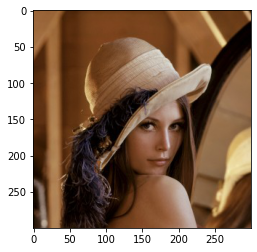

In [39]:
image = Image.open('lena.jpg')
plt.imshow(image);
print('Size:',image.size)
imageArray = np.array(image)

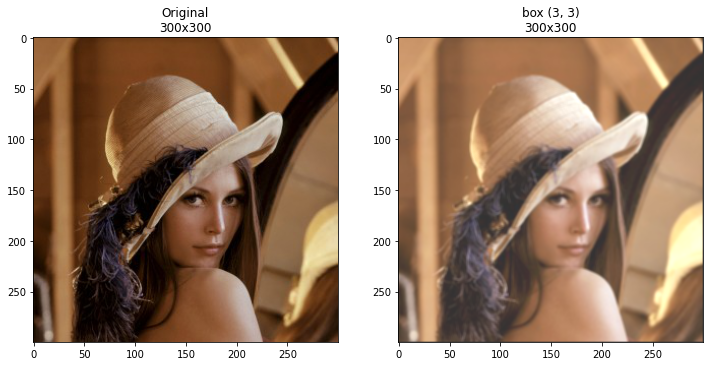

In [40]:
m, n, pivot, kernel, offset, zeroPadding = getArgs("info.txt")
result, m, n = correlation(imageArray, m, n, pivot, kernel, offset, zeroPadding)

fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original\n"+str(len(imageArray))+"x"+str(len(imageArray[0])))
fig.add_subplot(1, 2, 2)
plt.imshow(result)
plt.title(kernel+" ("+str(m)+", "+str(n)+")\n"+str(len(result))+"x"+str(len(result[0])));

## 5) Saturation HSB

In [30]:
def __rgb2hsbConverter(red, green, blue):
    red, green, blue = red/255., green/255., blue/255.
    cmax = max(red, green, blue)
    cmin = min(red, green, blue)
    diff = cmax-cmin

    if cmax == cmin: h = 0
    elif cmax == red: h = (60*((green-blue)/diff)+360)%360
    elif cmax == green: h = (60*((blue-red)/diff)+120)%360
    elif cmax == blue: h = (60*((red-green)/diff)+240)%360
 
    if cmax == 0: s = 0
    else: s = (diff / cmax) * 100
 
    b = cmax * 100

    return [h, s, b]
 
def rgb2hsb(image):
    for i in range(len(image)):
        for j in range(len(image[0])):
            image[i][j] = __rgb2hsbConverter(image[i][j][0], image[i][j][1], image[i][j][2])
    return image

def __hsb2rgbConverter(h, s, b):
    h = h/360.
    s = s/100
    b = b/100
    if s == 0.0: return [b*255, b*255, b*255]
    
    i = int(h*6.)
    f = (h*6.)-i
    p = b*(1.-s)
    q = b*(1.-s*f)
    t = b*(1.-s*(1.-f))

    return_value = []
    if i == 0: return_value = [b, t, p]
    if i == 1: return_value = [q, b, p]
    if i == 2: return_value = [p, b, t]
    if i == 3: return_value = [p, q, b]
    if i == 4: return_value = [t, p, b]
    if i == 5: return_value = [b, p, q]
    return [round(i*255) for i in return_value]

def hsb2rgb(image):
    for i in range(len(image)):
        for j in range(len(image[0])):
            image[i][j] = __hsb2rgbConverter(image[i][j][0], image[i][j][1], image[i][j][2])
    return image

def setSaturation(image, sat_value=0.5):
    HSVimage = rgb2hsb(image) #Converts the input image to HSB
    imageSat = getComponent(HSVimage,1) #Get the saturation value of all pixels
    imageSat = [i*sat_value for i in imageSat] #Changes the saturation. 0.6 = 60% of the original saturation
    HSVimage = setComponent(HSVimage, imageSat, 1) #The HSB image pixels recieves the new S values
    HSVimage = hsb2rgb(HSVimage) #Converts back to RGB
    return HSVimage

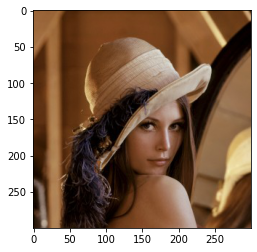

In [33]:
image = Image.open('lena.jpg')
plt.imshow(image);
imageArray = np.array(image)

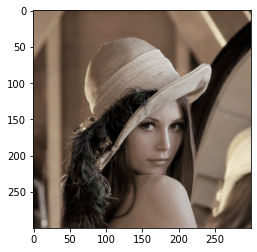

In [34]:
imagemFinal = setSaturation(imageArray, 0.5)
plt.imshow(imagemFinal);

In [ ]:
imagemFinal = Image.fromarray(imagemFinal.astype('uint8'), 'RGB').save("imagemFinal.jpg")